# Polynomial Regression

### What is Polynomial Regression?

**Polynomial Regression** is a type of math model we use to find a curved line that best fits a bunch of points (data) on a graph.

It’s like **drawing a curve** instead of a straight line to follow the pattern of your data.

---

###  Why Do We Need It?

Imagine you plot some points on a graph and they don’t make a straight line — maybe they form a **U-shape**, a hill, or a wave. A straight line (used in **Linear Regression**) won’t fit well.

That’s when we use **Polynomial Regression**, which lets us use **curved lines** to fit the data better.

---

###  An Example:

Let’s say we’re looking at the relationship between **a car’s speed** and its **fuel efficiency**. Maybe:

* At low speeds, fuel efficiency is good.
* At medium speeds, it gets better.
* At high speeds, fuel efficiency drops.

That might look like a **hill** or a **curve**, not a straight line. So we use Polynomial Regression to model it.

---

###  How Does It Work?

In Linear Regression, the equation looks like this:

```
y = a + b*x
```

In Polynomial Regression, we add more powers of `x` to get curves:

```
y = a + b*x + c*x² + d*x³ + ...
```

The higher the power (like x², x³...), the more flexible the curve.

---

###  Real-Life Examples

* Predicting the growth of plants over time 🌱
* Modeling the path of a basketball in the air 🏀
* Forecasting sales over seasons 📈

---

###  Visual Example:

* Linear Regression: just a straight line
* Polynomial Regression:

  * Degree 2: makes a **U** or **∩** shape
  * Degree 3+: can wiggle or curve more to match the data

---

###  Key Words

* **Regression** = finding a line or curve to fit data
* **Polynomial** = an expression with powers of x (like x², x³)
* **Overfitting** = when the curve fits the data too perfectly (like tracing every bump), but doesn’t predict new points well.

---

###  Summary

* Polynomial Regression helps us model data with curves.
* It’s great when the relationship isn’t a straight line.
* The more complex the curve (higher degree), the more closely it can fit the data.

# Implementing Polynomial Regression in Python

## Importing Necessary Libraries

In [1]:
# Import NumPy for numerical operations, especially arrays and mathematical functions
import numpy as np

# Import Pandas for data manipulation and analysis
import pandas as pd

# Import Matplotlib for data visualization (e.g., plotting graphs)
import matplotlib.pyplot as plt

# Import LinearRegression model from scikit-learn for fitting linear regression models
from sklearn.linear_model import LinearRegression

# Import PolynomialFeatures to transform features into polynomial combinations for polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# Import train_test_split to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import metrics for evaluating model performance (MSE and R² score)
from sklearn.metrics import mean_squared_error, r2_score

## Preparing the Dataset
For demonstration purposes, we’ll use a synthetic dataset where the
relationship between the independent variable x and the dependent
variable y is quadratic.

In [3]:
# Set the random seed for reproducibility
np.random.seed(0)

# Generate 100 random values from a normal distribution, scale and shift them
# x values are generated by shifting 2 and scaling -3 * N(0,1)
x = 2 - 3 * np.random.normal(0, 1, 100)

# Generate corresponding y values using a quadratic relationship with noise
# y = x - 2x² + noise (noise comes from N(-3, 3))
y = x - 2 * (x ** 2) + np.random.normal(-3, 3, 100)

# Create a Pandas DataFrame to store x and y as columns 'X' and 'Y'
data = pd.DataFrame({'X': x, 'Y': y})

## Visualizing the Data
Before diving into modeling, it’s crucial to understand the data’s
underlying patterns

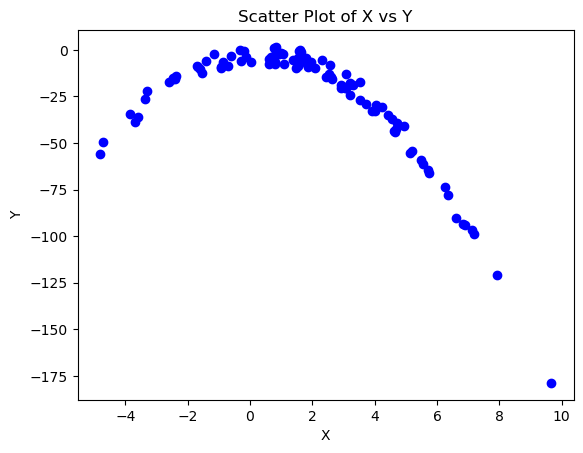

In [4]:
# Create a scatter plot to visualize the relationship between X and Y
plt.scatter(data['X'], data['Y'], color='blue')
plt.title('Scatter Plot of X vs Y')  # Set the title of the plot
plt.xlabel('X')  # Label x-axis
plt.ylabel('Y')  # Label y-axis
plt.show()  # Display the plot

## Creating Polynomial Features
To capture the non-linear relationship, we’ll transform the original
feature X into polynomial features.

In [5]:
# Reshape X for sklearn
X = data[['X']].values  # Extract the 'X' column from the DataFrame and convert it to a 2D NumPy array (required by sklearn)
y = data['Y'].values    # Extract the 'Y' column from the DataFrame and convert it to a 1D NumPy array (target variable)

# Transform features to polynomial features
poly = PolynomialFeatures(degree=2)  # Create a PolynomialFeatures transformer with degree 2 (includes x and x^2)
X_poly = poly.fit_transform(X)       # Fit the transformer to X and transform it to include polynomial features

# Print shapes of the original and transformed feature sets
print("Original Features Shape:", X.shape)       # Output the shape of the original feature matrix
print("Polynomial Features Shape:", X_poly.shape)  # Output the shape of the polynomial feature matrix

Original Features Shape: (100, 1)
Polynomial Features Shape: (100, 3)


## Splitting the Dataset
We’ll split the data into training and testing sets to evaluate the
model’s performance on unseen data.

In [6]:
# Split the dataset into training and testing sets
# X_poly: the input features (after polynomial transformation, if using PolynomialFeatures)
# y: the target variable
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=0: ensures reproducibility of the split (same split every time you run the code)
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=0
)

## Training the Model
Using linear regression on the polynomial features to fit the model.

In [7]:
# Initialize the Linear Regression model from scikit-learn
model = LinearRegression()

# Train the model using the training data (X_train as input features, y_train as target values)
model.fit(X_train, y_train)

LinearRegression()

## Making Predictions
Predicting on both training and testing datasets to evaluate
performance

In [8]:
# Make predictions on the training set using the trained model
y_train_pred = model.predict(X_train)

# Make predictions on the test set using the trained model
y_test_pred = model.predict(X_test)

## Visualizing the Polynomial Regression Fit
Plotting the regression curve against the actual data points.

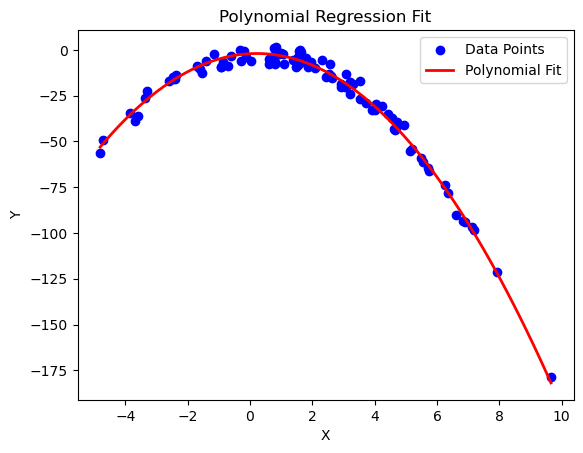

In [9]:
# Generate a range of values for X to create a smooth curve for plotting
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate 100 evenly spaced values from min to max of X and reshape to a column vector

# Transform the X_range using the polynomial transformer (e.g., adding X^2, X^3 terms if needed)
X_range_poly = poly.transform(X_range)

# Use the trained polynomial regression model to predict Y values for the X_range
y_range_pred = model.predict(X_range_poly)

# Plot the original data points as a scatter plot (blue dots)
plt.scatter(data['X'], data['Y'], color='blue', label='Data Points')

# Plot the predicted polynomial regression curve (red line)
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Polynomial Fit')

# Add a title and axis labels to the plot
plt.title('Polynomial Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')

# Display the legend to differentiate between data points and the regression line
plt.legend()
# Show the final plot
plt.show()

NOTE: Curve Plotting: Shows how well the polynomial regression model
fits the data. Red Line: Represents the fitted polynomial curve.

## Evaluating the Model
Assessing the model’s performance using metrics like Mean Squared
Error (MSE) and R-squared (R²).

In [12]:
# Calculate Mean Squared Error (MSE) for the training data
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) for the testing data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared (R²) score for the training data
r2_train = r2_score(y_train, y_train_pred)

# Calculate R-squared (R²) score for the testing data
r2_test = r2_score(y_test, y_test_pred)

# Print the training MSE with two decimal places
print(f"Training MSE: {mse_train:.2f}")

# Print the testing MSE with two decimal places
print(f"Testing MSE: {mse_test:.2f}")

# Print the training R² score with two decimal places
print(f"Training R^2: {r2_train:.2f}")

# Print the testing R² score with two decimal places
print(f"Testing R^2: {r2_test:.2f}")

Training MSE: 9.73
Testing MSE: 8.70
Training R^2: 0.99
Testing R^2: 0.99


NOTE: 
* **MSE (Mean Squared Error):** Measures the average squared difference between actual and predicted values. Lower is better.
* **R² (R-squared):** Measures how well the model explains the variability of the target variable. Closer to 1 is better.

# Hyperparameter Tuning and Model Optimization
Choosing the right degree for the polynomial is crucial. A degree
that’s too low may underfit the data, while a degree that’s too high
can overfit

## Selecting the Optimal Polynomial Degree
We can use cross-validation to determine the optimal degree.

Degree 1: MSE = 615.83
Degree 2: MSE = 9.99
Degree 3: MSE = 11.50
Degree 4: MSE = 10.34
Degree 5: MSE = 16.26


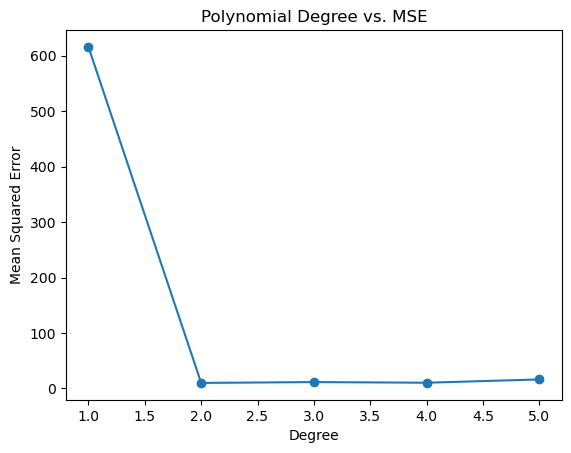

In [13]:
# Import cross_val_score for model evaluation with cross-validation
from sklearn.model_selection import cross_val_score

# List of polynomial degrees to evaluate
degrees = [1, 2, 3, 4, 5]

# Initialize an empty list to store mean squared error for each degree
mse_scores = []

# Loop through each degree to fit and evaluate polynomial regression models
for degree in degrees:
    # Create polynomial features of the given degree
    poly = PolynomialFeatures(degree)

    # Transform the input feature matrix X to include polynomial terms
    X_poly = poly.fit_transform(X)

    # Initialize a linear regression model
    model = LinearRegression()

    # Perform 5-fold cross-validation and calculate negative mean squared error
    scores = cross_val_score(
        model,              # model to evaluate
        X_poly,             # transformed features
        y,                  # target variable
        scoring='neg_mean_squared_error',  # scoring metric
        cv=5                # number of cross-validation folds
    )

    # Take the mean of the negative MSE scores and convert it to positive MSE
    mse = -scores.mean()

    # Store the MSE score for the current degree
    mse_scores.append(mse)

    # Print out the result for the current degree
    print(f"Degree {degree}: MSE = {mse:.2f}")

# --- Plotting the results ---

# Plot polynomial degree vs. MSE
plt.plot(degrees, mse_scores, marker='o')
plt.title('Polynomial Degree vs. MSE')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.show()

NOTE:
* **Cross-Validation**: Provides a more reliable estimate of model performance.
* **Optimal Degree**: In this case, degree 2 provides a substantial improvement over degree 1, with degrees 3-5 showing marginal gains.

## Regularization to Prevent Overfitting
For higher-degree polynomials, incorporating regularization
techniques like Ridge or Lasso can mitigate overfitting.


In [15]:
from sklearn.linear_model import Ridge  # Import the Ridge Regression model from scikit-learn

# Initialize Ridge Regression model with regularization strength alpha = 1.0
# Ridge regression is a type of linear regression that includes L2 regularization to prevent overfitting
ridge = Ridge(alpha=1.0)

# Train the Ridge Regression model using the training data (features and labels)
ridge.fit(X_train, y_train)

# Make predictions on both the training and testing datasets
y_train_pred_ridge = ridge.predict(X_train)  # Predictions for training data
y_test_pred_ridge = ridge.predict(X_test)    # Predictions for testing data

# Evaluate model performance using Mean Squared Error (MSE)
# MSE measures the average squared difference between predicted and actual values (lower is better)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)  # MSE for training data
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)     # MSE for testing data

# Evaluate model performance using R² score (coefficient of determination)
# R² measures how well the model explains the variance in the data (closer to 1 is better)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)  # R² for training data
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)     # R² for testing data

# Print out the evaluation results for both training and testing sets
print(f"Ridge Training MSE: {mse_train_ridge:.2f}")
print(f"Ridge Testing MSE: {mse_test_ridge:.2f}")
print(f"Ridge Training R^2: {r2_train_ridge:.2f}")
print(f"Ridge Testing R^2: {r2_test_ridge:.2f}")

Ridge Training MSE: 9.73
Ridge Testing MSE: 8.70
Ridge Training R^2: 0.99
Ridge Testing R^2: 0.99


NOTE:
* **Ridge Regression**: Adds L2 regularization to penalize large coefficients, reducing model complexity.
* **Impact**: In this scenario, regularization maintains model performance without noticeable overfitting.